<a href="https://colab.research.google.com/github/Cristian-Rojas2/TalentoTech/blob/main/Copia_de_Componentes_principales_y_clustersCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset World Happiness Report

El Informe Mundial sobre la Felicidad es un estudio de referencia sobre el estado de la felicidad mundial. El primer informe se publicó en 2012, el segundo en 2013, el tercero en 2015 y el cuarto en la Actualización de 2016. El Informe Mundial sobre la Felicidad 2017, que clasifica a 155 países según sus niveles de felicidad, se presentó en las Naciones Unidas en un evento que celebraba el Día Internacional de la Felicidad el 20 de marzo. El informe sigue ganando reconocimiento mundial a medida que los gobiernos, las organizaciones y la sociedad civil utilizan cada vez más los indicadores de felicidad para fundamentar sus decisiones de formulación de políticas. Los principales expertos en todos los campos (economía, psicología, análisis de encuestas, estadísticas nacionales, salud, políticas públicas y más) describen cómo se pueden utilizar eficazmente las mediciones del bienestar para evaluar el progreso de las naciones. Los informes analizan el estado de la felicidad en el mundo actual y muestran cómo la nueva ciencia de la felicidad explica las variaciones personales y nacionales en la felicidad.

In [32]:
# Librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import matplotlib.font_manager
from matplotlib import style
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA

In [33]:
!pip install kaggle

# Sube tu archivo kaggle.json
from google.colab import files
files.upload()

# Crea un directorio y mueve kaggle.json
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Descargar el dataset
!kaggle datasets download -d unsdsn/world-happiness

# Descomprimir el dataset
!unzip world-happiness.zip

# Leer el archivo CSV
import pandas as pd
df = pd.read_csv('/content/Wholesale customers data.csv')

print(df.head(10))

Saving Wholesale customers data.csv to Wholesale customers data (2).csv
mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/unsdsn/world-happiness
License(s): CC0-1.0
world-happiness.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  world-happiness.zip
replace 2015.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: no
replace 2016.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: no
replace 2017.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: no
replace 2018.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: no
replace 2019.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: no
   Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669   9656     7561     214              2674   
1        2       3   7057   9810     9568    1762              3293   
2     

In [34]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [35]:


# Imprimir las primeras 5 filas del DataFrame (sin la columna eliminada)
print(df.head())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.

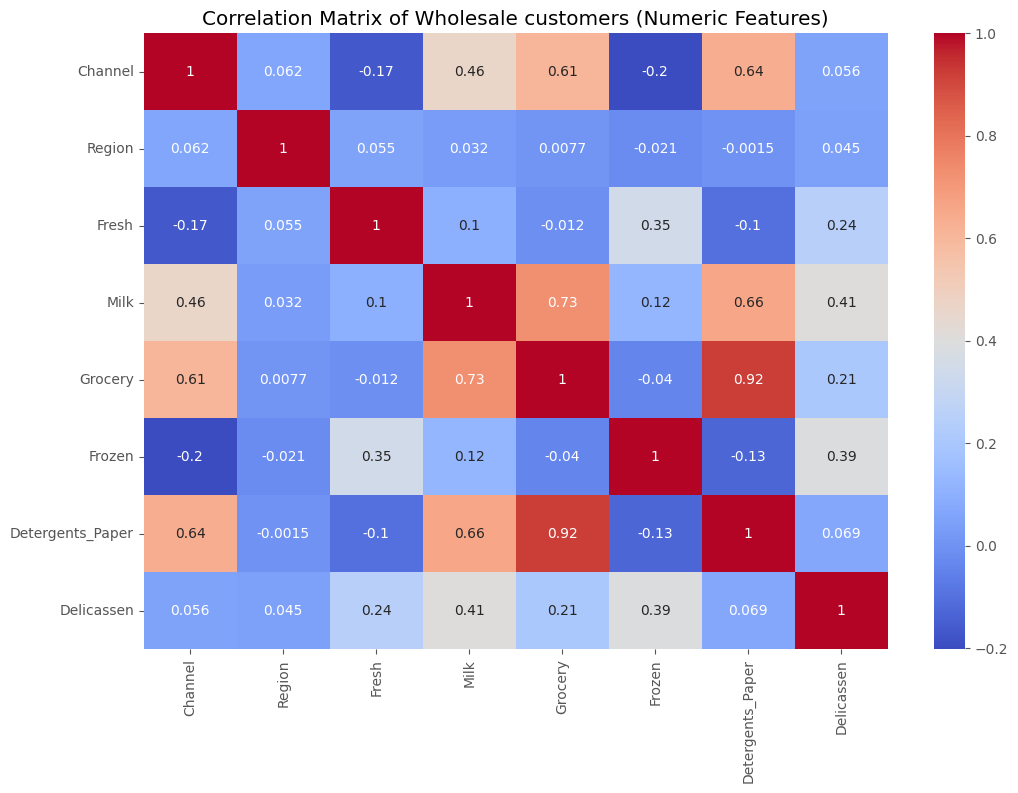

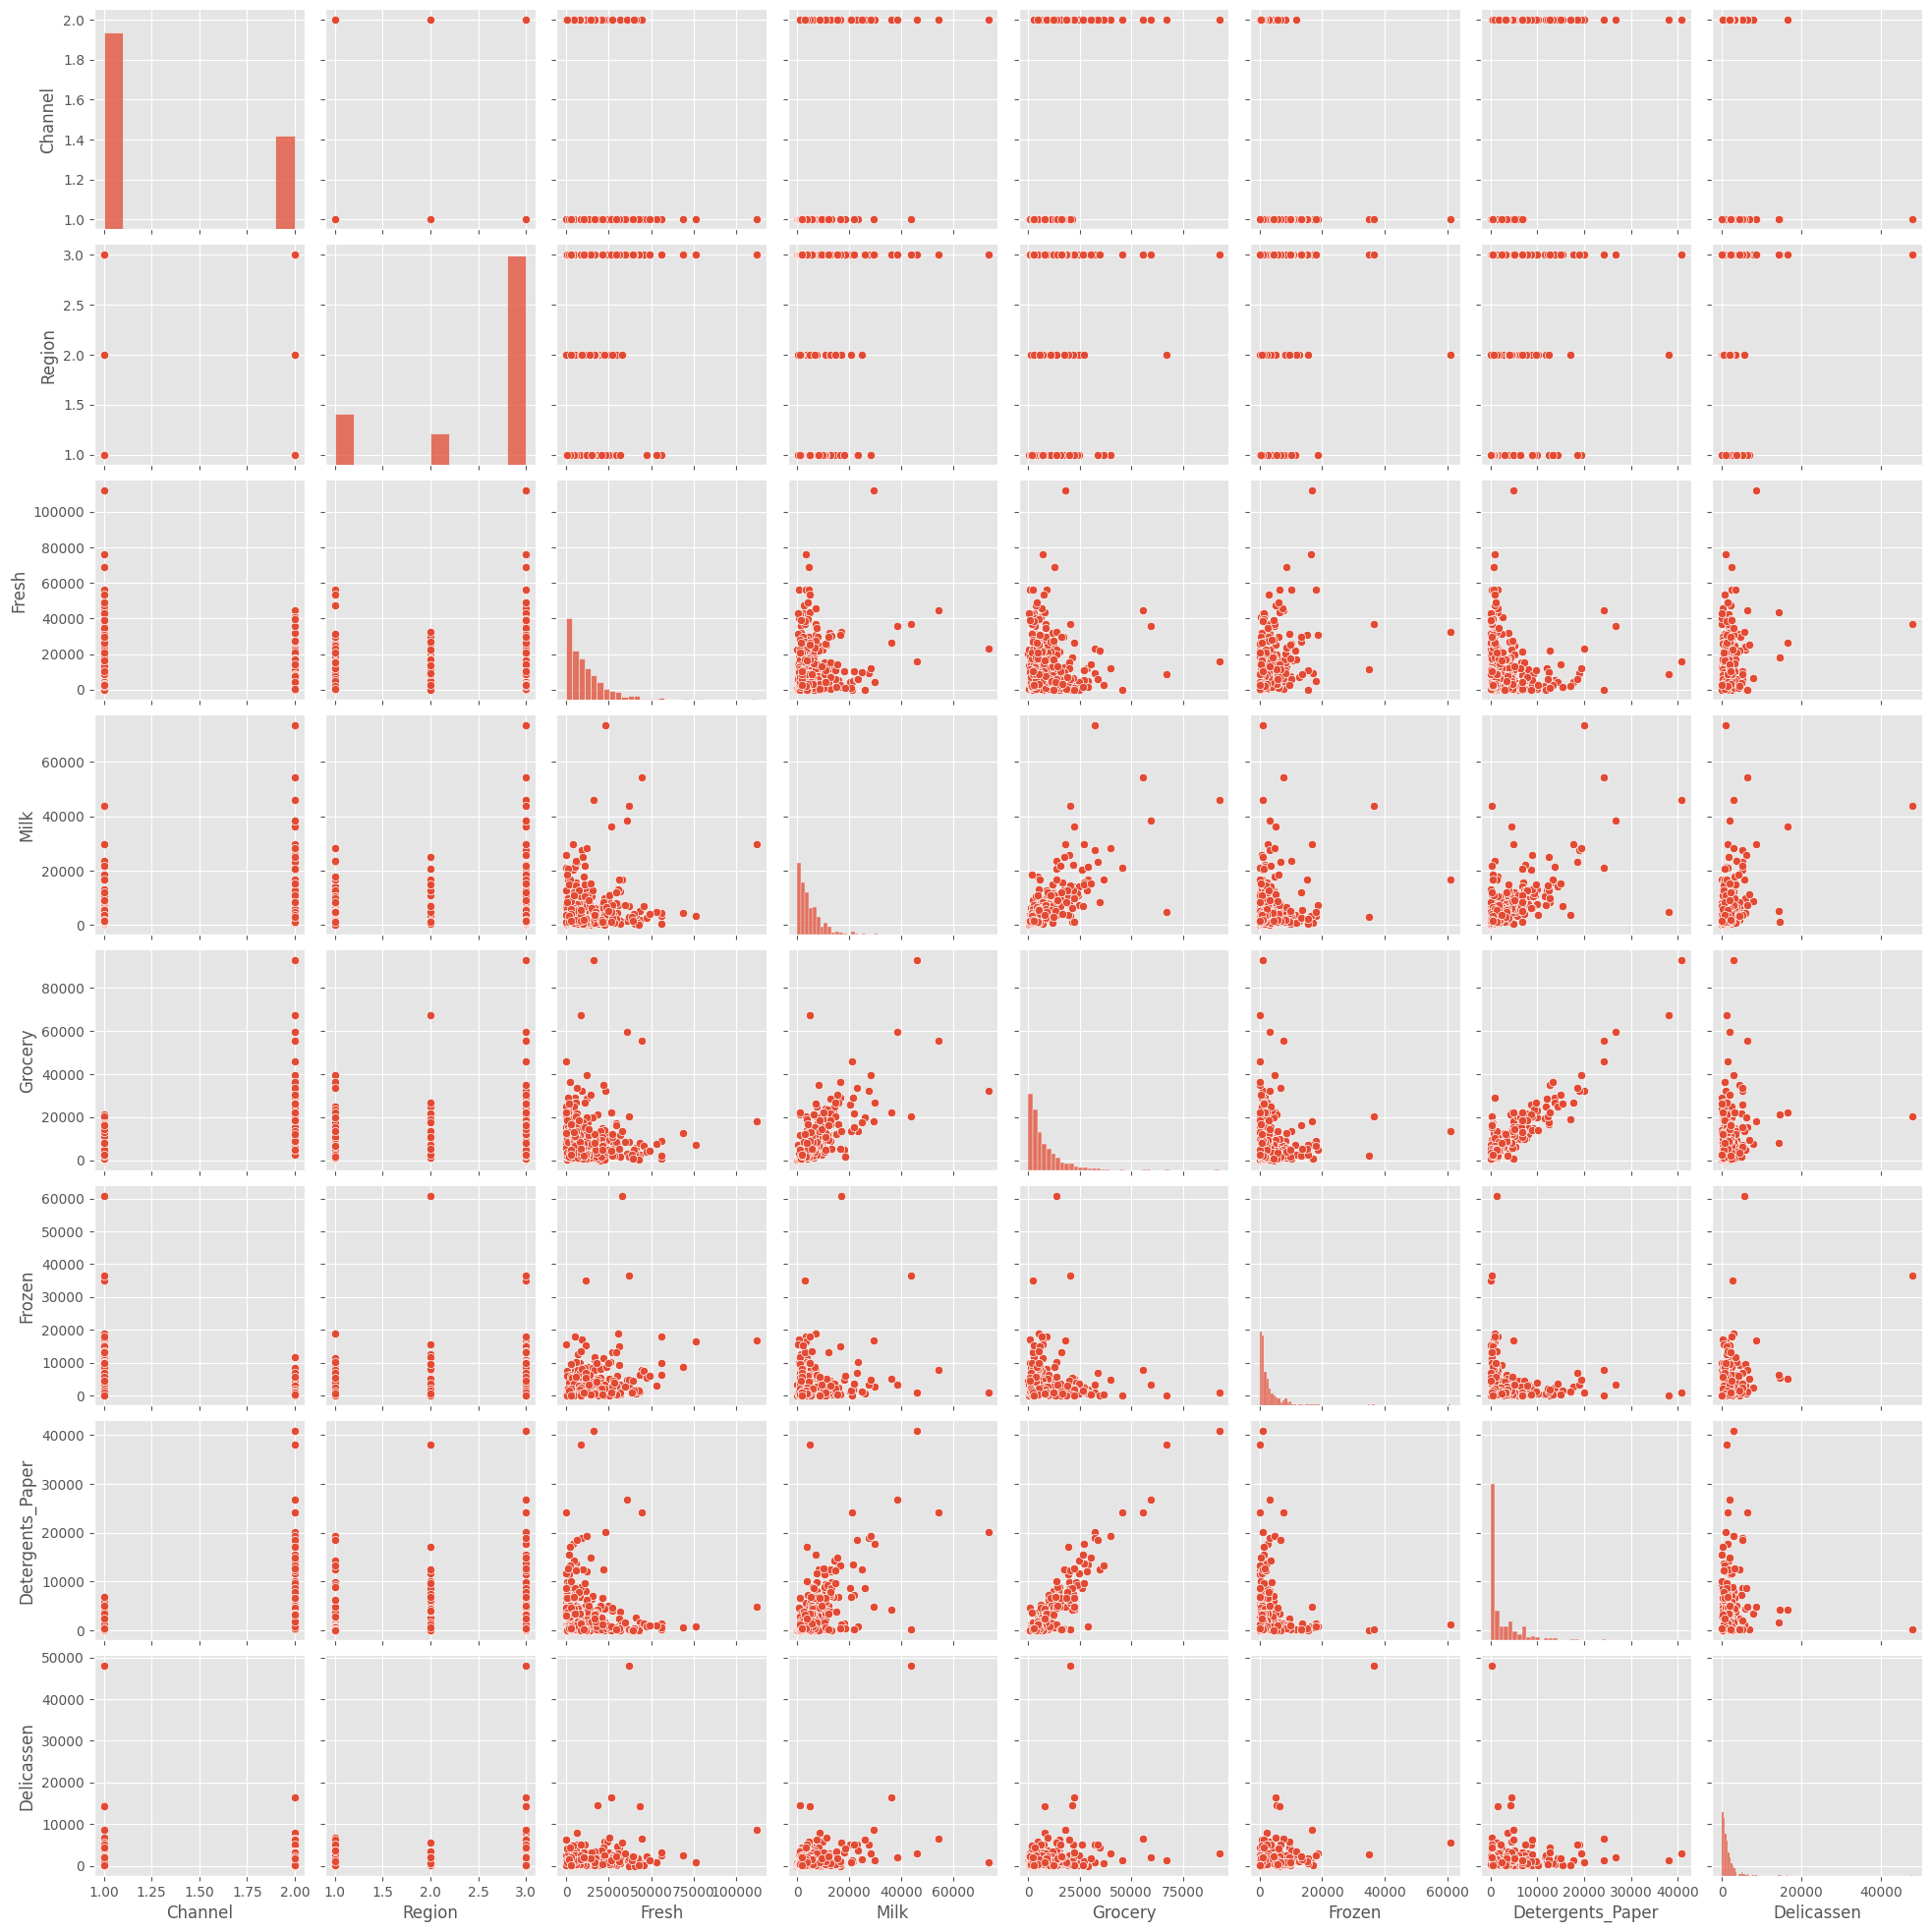

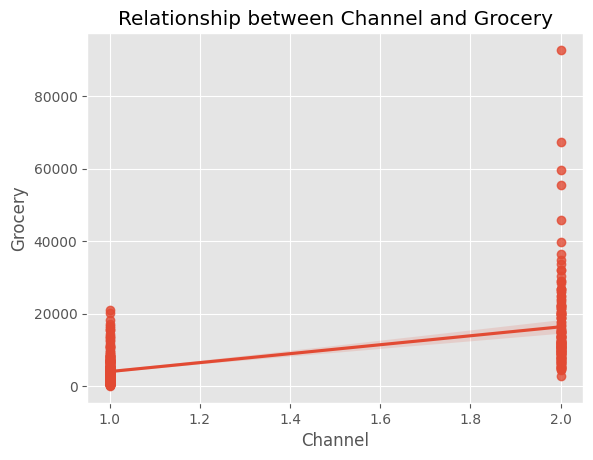

In [36]:
# Seleccionar sólo columnas numéricas para el análisis de correlación
numeric_df = df.select_dtypes(include=np.number)

# Estadísticas descriptivas para características numéricas
print(numeric_df.describe())

# Matriz de correlación para características numéricas
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

# Mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Wholesale customers (Numeric Features)')
plt.show()

# Pairplot para visualizar relaciones entre variables numéricas
sns.pairplot(numeric_df)
plt.show()

# Análisis de regresión (ejemplo: relación entre el PIB y el índice de felicidad)
sns.regplot(x='Channel', y='Grocery', data=df)  # Usando df original para contexto
plt.title('Relationship between Channel and Grocery')
plt.show()

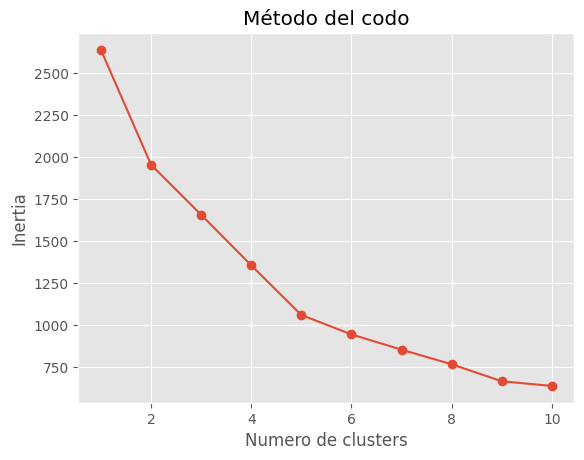

In [37]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#Escalar los datos
x = df.drop(['Channel', 'Region',],  axis=1)
x = StandardScaler().fit_transform(x)

#Encontrar la cantidad óptima de clusters utilizando el método del codo
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)

#Graficar el metodo del codo
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Numero de clusters')
plt.ylabel('Inertia')
plt.title('Método del codo')
plt.show()

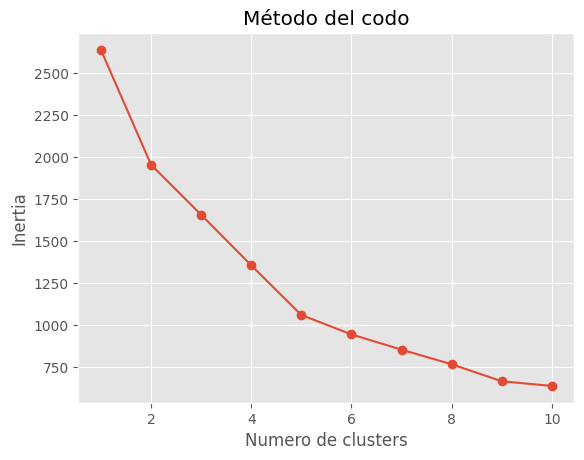

In [38]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#Escalar los datos
# Selecting the desired features for clustering: 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'
x = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]
x = StandardScaler().fit_transform(x)

#Encontrar la cantidad óptima de clusters utilizando el método del codo
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)

#Graficar el metodo del codo
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Numero de clusters')
plt.ylabel('Inertia')
plt.title('Método del codo')
plt.show()

          Channel    Region         Fresh          Milk       Grocery  \
cluster                                                                 
0        2.000000  2.674603   8130.031746   8874.071429  14139.150794   
1        1.000000  3.000000  11941.285000   3060.570000   3497.935000   
2        2.000000  2.500000  15964.900000  34708.500000  48536.900000   
3        1.055556  1.311111  11979.055556   3210.777778   4122.411111   
4        1.071429  2.785714  44980.428571  13146.785714  11504.000000   

               Frozen  Detergents_Paper   Delicassen  cluster  
cluster                                                        
0         1339.476190       6104.936508  1542.706349      0.0  
1         2950.780000        755.690000  1101.195000      1.0  
2         3054.600000      24875.200000  2942.800000      2.0  
3         3288.777778        861.344444  1130.755556      3.0  
4        19013.142857       1516.000000  8937.642857      4.0  


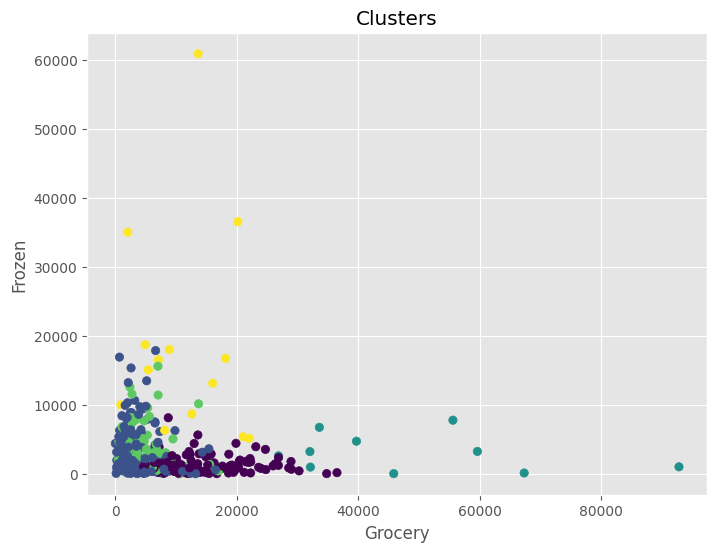

In [39]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Seleccionar las columnas relevantes para el clustering
X = df[['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]

# Escalar los datos para que todas las variables tengan la misma importancia
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elegir el número de clusters (puedes ajustar este valor)
n_clusters = 5   #Técnica de codo, método de la  silueta.

# Crear el modelo KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Entrenar el modelo con los datos escalados
kmeans.fit(X_scaled)

# Asignar las etiquetas de cluster a los datos
datosorginal=df
df['cluster'] = kmeans.labels_

# Calculate the mean for only numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns
cluster_means = df.groupby('cluster')[numeric_cols].mean()  # Select numeric columns for mean calculation

# Mostrar los resultados
print(cluster_means)

# Visualizar los clusters (ejemplo con dos variables)
plt.figure(figsize=(8, 6))
plt.scatter(df['Grocery'], df['Frozen'], c=df['cluster'], cmap='viridis')
plt.xlabel('Grocery')
plt.ylabel('Frozen')
plt.title('Clusters')
plt.show()


Análisis del Cluster 0:

Estadísticas Descriptivas:
       Channel      Region         Fresh          Milk       Grocery  \
count    126.0  126.000000    126.000000    126.000000    126.000000   
mean       2.0    2.674603   8130.031746   8874.071429  14139.150794   
std        0.0    0.642861   8177.737377   4704.885056   6828.937411   
min        2.0    1.000000     18.000000   1124.000000   4523.000000   
25%        2.0    3.000000   2026.000000   6066.500000   9365.250000   
50%        2.0    3.000000   5474.000000   7690.500000  12132.500000   
75%        2.0    3.000000  11897.750000  11101.000000  18831.500000   
max        2.0    3.000000  40721.000000  25862.000000  36486.000000   

            Frozen  Detergents_Paper   Delicassen  cluster  
count   126.000000        126.000000   126.000000    126.0  
mean   1339.476190       6104.936508  1542.706349      0.0  
std    1245.831948       3501.821085  1440.910396      0.0  
min      33.000000        523.000000     3.000000     

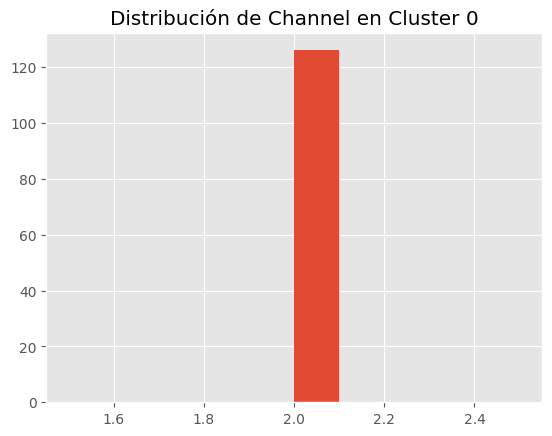


Variable: Fresh
count      126.000000
mean      8130.031746
std       8177.737377
min         18.000000
25%       2026.000000
50%       5474.000000
75%      11897.750000
max      40721.000000
Name: Fresh, dtype: float64


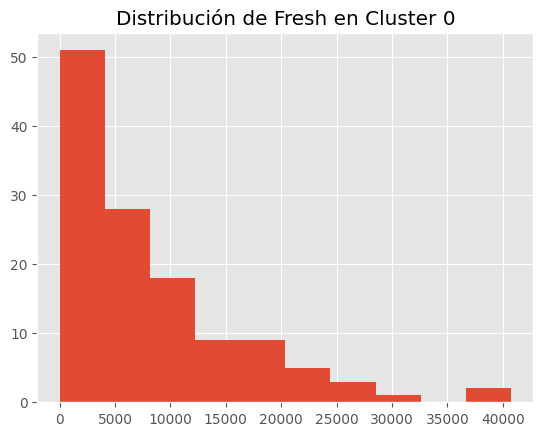


Variable: Grocery
count      126.000000
mean     14139.150794
std       6828.937411
min       4523.000000
25%       9365.250000
50%      12132.500000
75%      18831.500000
max      36486.000000
Name: Grocery, dtype: float64


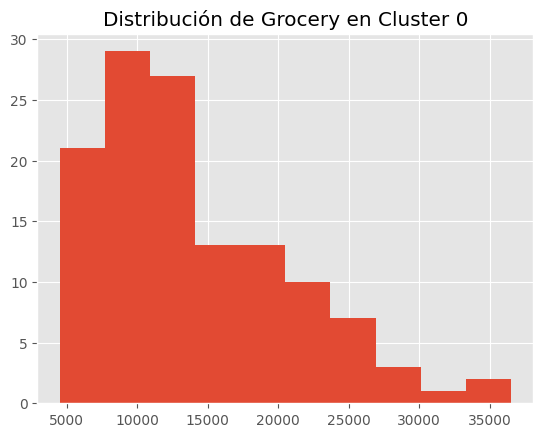


Variable: Frozen
count     126.000000
mean     1339.476190
std      1245.831948
min        33.000000
25%       483.000000
50%      1012.000000
75%      1740.750000
max      8132.000000
Name: Frozen, dtype: float64


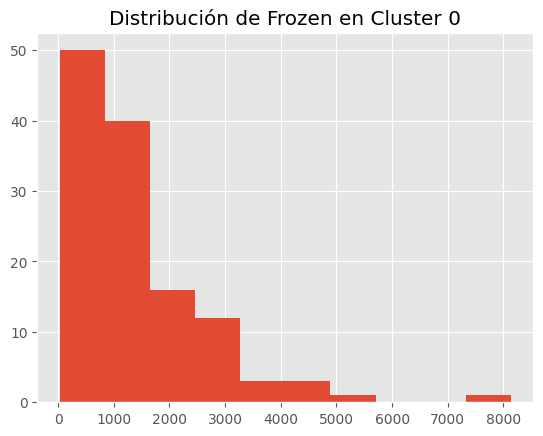


Regiones en el Cluster:
Region
3    97
2    17
1    12
Name: count, dtype: int64

Análisis del Cluster 1:

Estadísticas Descriptivas:
       Channel  Region         Fresh         Milk       Grocery        Frozen  \
count    200.0   200.0    200.000000    200.00000    200.000000    200.000000   
mean       1.0     3.0  11941.285000   3060.57000   3497.935000   2950.780000   
std        0.0     0.0  10705.602809   2877.02631   2859.541459   3291.479437   
min        1.0     3.0      3.000000     55.00000      3.000000     25.000000   
25%        1.0     3.0   3454.250000   1174.25000   1659.500000    738.000000   
50%        1.0     3.0   9132.000000   2146.00000   2569.500000   1697.500000   
75%        1.0     3.0  17275.750000   3932.75000   4540.500000   3884.750000   
max        1.0     3.0  49063.000000  21858.00000  16483.000000  17866.000000   

       Detergents_Paper   Delicassen  cluster  
count        200.000000   200.000000    200.0  
mean         755.690000  1101.195000   

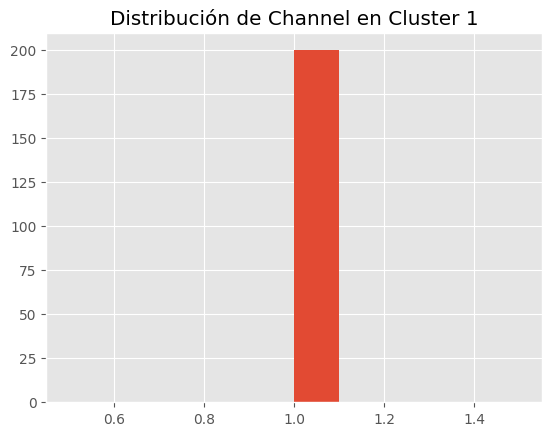


Variable: Fresh
count      200.000000
mean     11941.285000
std      10705.602809
min          3.000000
25%       3454.250000
50%       9132.000000
75%      17275.750000
max      49063.000000
Name: Fresh, dtype: float64


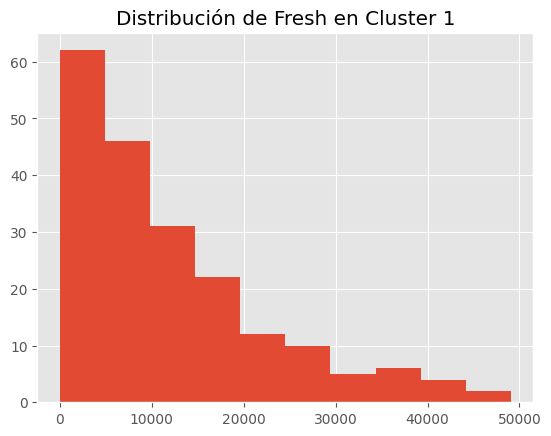


Variable: Grocery
count      200.000000
mean      3497.935000
std       2859.541459
min          3.000000
25%       1659.500000
50%       2569.500000
75%       4540.500000
max      16483.000000
Name: Grocery, dtype: float64


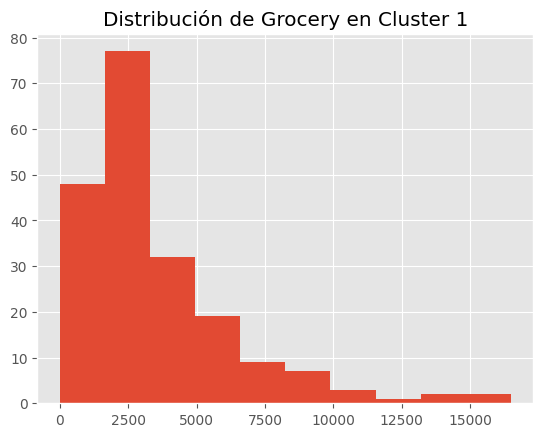


Variable: Frozen
count      200.000000
mean      2950.780000
std       3291.479437
min         25.000000
25%        738.000000
50%       1697.500000
75%       3884.750000
max      17866.000000
Name: Frozen, dtype: float64


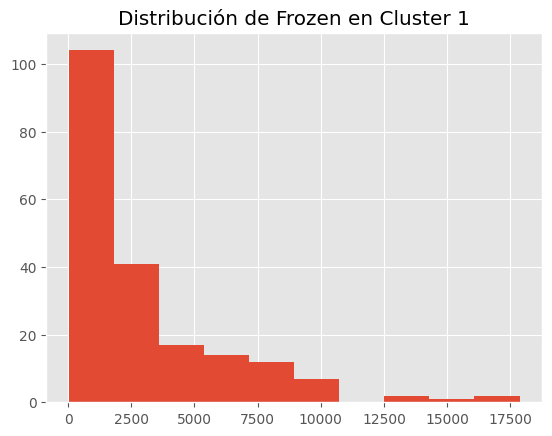


Regiones en el Cluster:
Region
3    200
Name: count, dtype: int64

Análisis del Cluster 2:

Estadísticas Descriptivas:
       Channel     Region         Fresh          Milk      Grocery  \
count     10.0  10.000000     10.000000     10.000000     10.00000   
mean       2.0   2.500000  15964.900000  34708.500000  48536.90000   
std        0.0   0.849837  14394.616621  19308.486409  20553.47215   
min        2.0   1.000000     85.000000   4980.000000  26866.00000   
25%        2.0   2.250000   6741.750000  24217.750000  32482.00000   
50%        2.0   3.000000  10658.500000  29109.000000  42761.00000   
75%        2.0   3.000000  21223.000000  44240.000000  58591.25000   
max        2.0   3.000000  44466.000000  73498.000000  92780.00000   

            Frozen  Detergents_Paper   Delicassen  cluster  
count    10.000000         10.000000    10.000000     10.0  
mean   3054.600000      24875.200000  2942.800000      2.0  
std    2689.795994       8250.298699  1966.992504      0.0  
min  

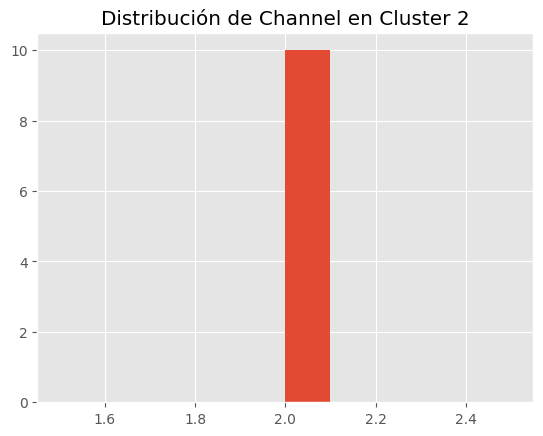


Variable: Fresh
count       10.000000
mean     15964.900000
std      14394.616621
min         85.000000
25%       6741.750000
50%      10658.500000
75%      21223.000000
max      44466.000000
Name: Fresh, dtype: float64


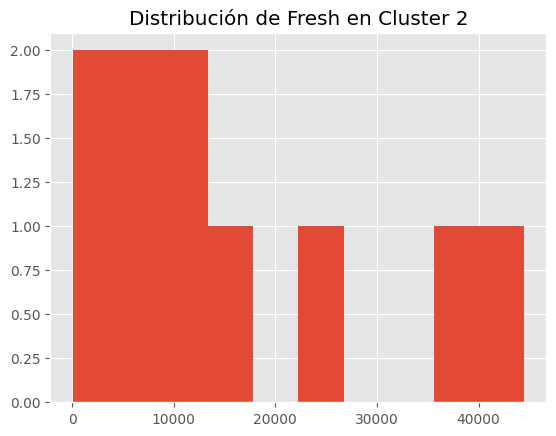


Variable: Grocery
count       10.00000
mean     48536.90000
std      20553.47215
min      26866.00000
25%      32482.00000
50%      42761.00000
75%      58591.25000
max      92780.00000
Name: Grocery, dtype: float64


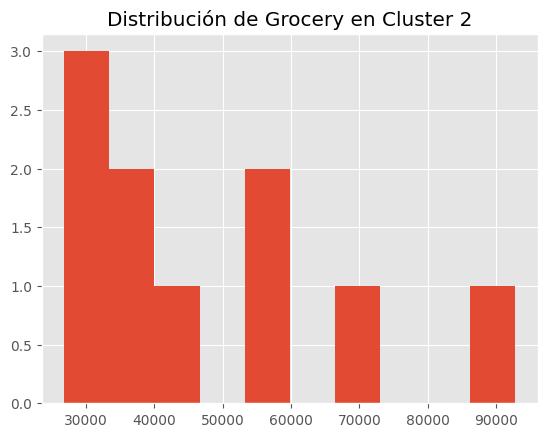


Variable: Frozen
count      10.000000
mean     3054.600000
std      2689.795994
min        36.000000
25%       996.750000
50%      2924.000000
75%      4365.500000
max      7782.000000
Name: Frozen, dtype: float64


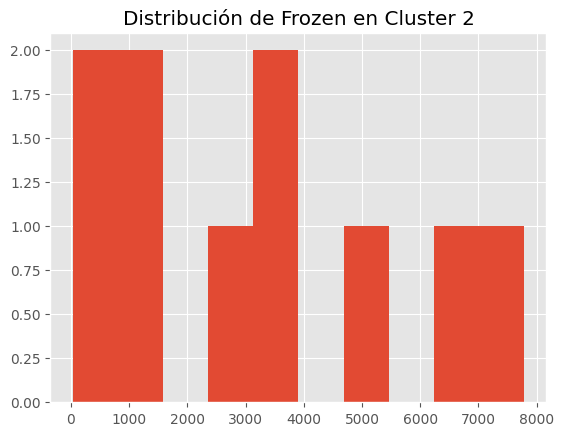


Regiones en el Cluster:
Region
3    7
1    2
2    1
Name: count, dtype: int64

Análisis del Cluster 3:

Estadísticas Descriptivas:
         Channel     Region         Fresh          Milk       Grocery  \
count  90.000000  90.000000     90.000000     90.000000     90.000000   
mean    1.055556   1.311111  11979.055556   3210.777778   4122.411111   
std     0.230345   0.465542  10891.653013   3642.826933   3287.569540   
min     1.000000   1.000000      3.000000    258.000000    489.000000   
25%     1.000000   1.000000   4219.750000   1051.500000   1923.750000   
50%     1.000000   1.000000   9174.000000   1962.000000   2885.000000   
75%     1.000000   2.000000  16905.500000   3783.250000   5315.250000   
max     2.000000   2.000000  56083.000000  23527.000000  16966.000000   

             Frozen  Detergents_Paper   Delicassen  cluster  
count     90.000000         90.000000    90.000000     90.0  
mean    3288.777778        861.344444  1130.755556      3.0  
std     3151.411069     

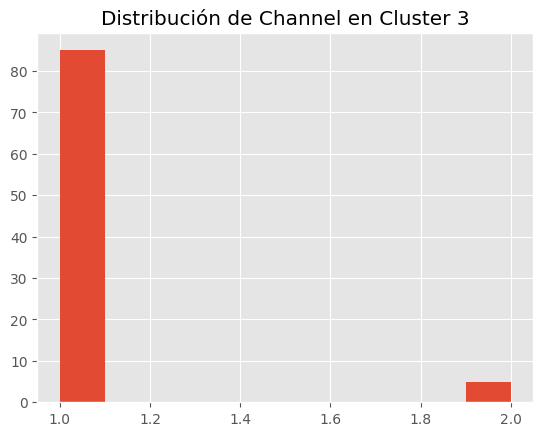


Variable: Fresh
count       90.000000
mean     11979.055556
std      10891.653013
min          3.000000
25%       4219.750000
50%       9174.000000
75%      16905.500000
max      56083.000000
Name: Fresh, dtype: float64


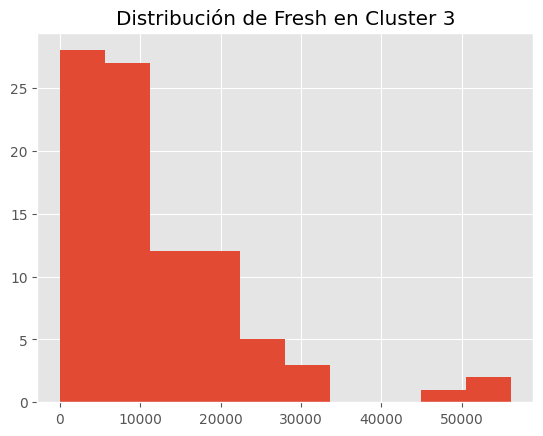


Variable: Grocery
count       90.000000
mean      4122.411111
std       3287.569540
min        489.000000
25%       1923.750000
50%       2885.000000
75%       5315.250000
max      16966.000000
Name: Grocery, dtype: float64


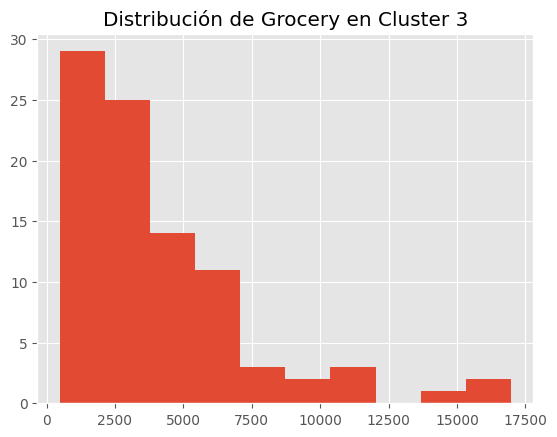


Variable: Frozen
count       90.000000
mean      3288.777778
std       3151.411069
min         91.000000
25%        979.000000
50%       2251.000000
75%       4587.250000
max      15601.000000
Name: Frozen, dtype: float64


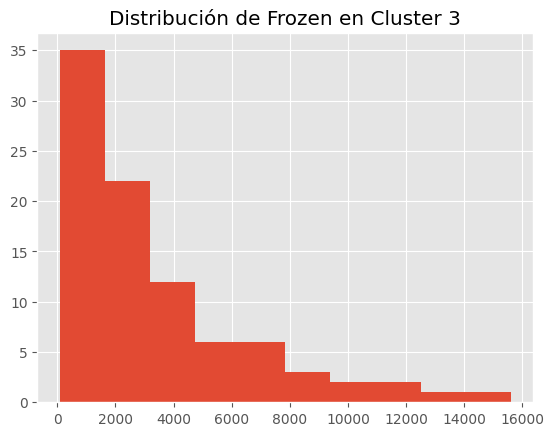


Regiones en el Cluster:
Region
1    62
2    28
Name: count, dtype: int64

Análisis del Cluster 4:

Estadísticas Descriptivas:
         Channel     Region          Fresh          Milk       Grocery  \
count  14.000000  14.000000      14.000000     14.000000     14.000000   
mean    1.071429   2.785714   44980.428571  13146.785714  11504.000000   
std     0.267261   0.578934   26829.595988  14016.819546   7161.183927   
min     1.000000   1.000000   11314.000000    555.000000    902.000000   
25%     1.000000   3.000000   29933.250000   3480.750000   5847.250000   
50%     1.000000   3.000000   34782.000000   6117.000000  10757.500000   
75%     1.000000   3.000000   56139.750000  16759.750000  17617.750000   
max     2.000000   3.000000  112151.000000  43950.000000  22019.000000   

             Frozen  Detergents_Paper    Delicassen  cluster  
count     14.000000         14.000000     14.000000     14.0  
mean   19013.142857       1516.000000   8937.642857      4.0  
std    15452.8433

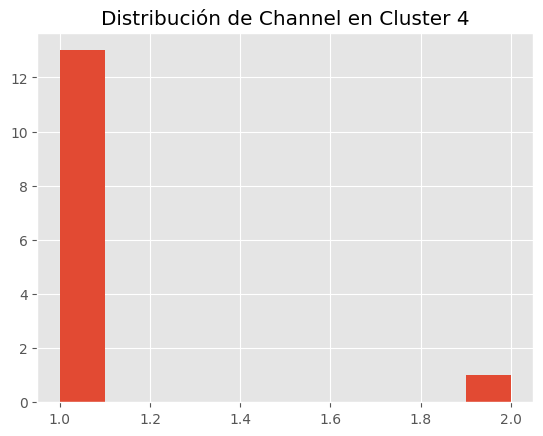


Variable: Fresh
count        14.000000
mean      44980.428571
std       26829.595988
min       11314.000000
25%       29933.250000
50%       34782.000000
75%       56139.750000
max      112151.000000
Name: Fresh, dtype: float64


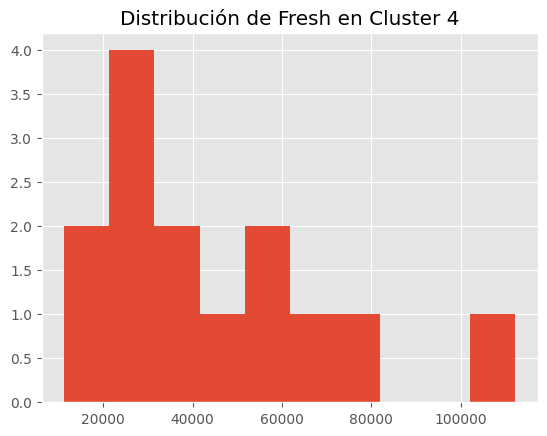


Variable: Grocery
count       14.000000
mean     11504.000000
std       7161.183927
min        902.000000
25%       5847.250000
50%      10757.500000
75%      17617.750000
max      22019.000000
Name: Grocery, dtype: float64


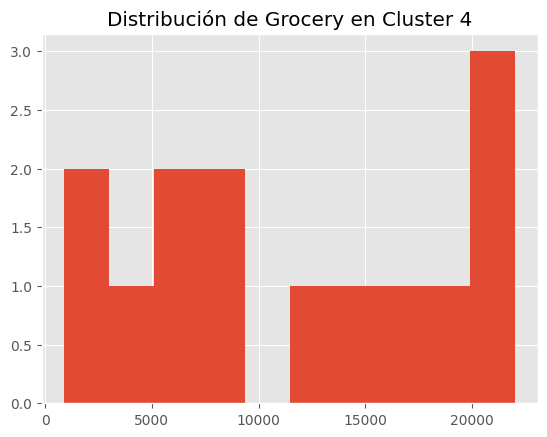


Variable: Frozen
count       14.000000
mean     19013.142857
std      15452.843303
min       5154.000000
25%       9019.500000
50%      15810.000000
75%      18540.250000
max      60869.000000
Name: Frozen, dtype: float64


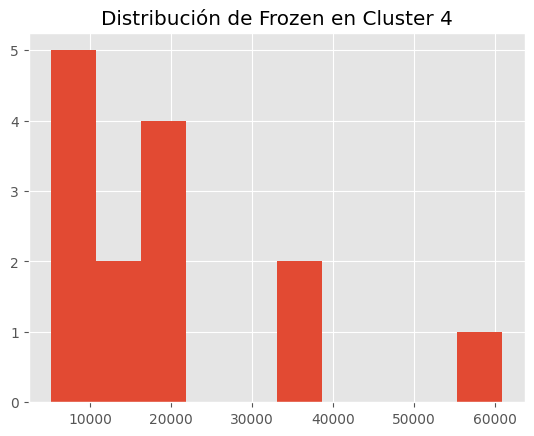


Regiones en el Cluster:
Region
3    12
1     1
2     1
Name: count, dtype: int64


In [40]:
# Analizar cada cluster por separado
for cluster_num in range(n_clusters):
  print(f"\nAnálisis del Cluster {cluster_num}:")
  cluster_data = df[df['cluster'] == cluster_num]

  # Estadísticas descriptivas para variables numéricas
  print("\nEstadísticas Descriptivas:")
  print(cluster_data.describe())

  # Distribución de variables clave (ejemplo: GDP per capita, Social support)
  print("\nDistribución de Variables Clave:")
  for col in ['Channel', 'Fresh', 'Grocery', 'Frozen']:
    print(f"\nVariable: {col}")
    print(cluster_data[col].describe())
    # Puedes agregar un histograma para visualizar la distribución
    plt.hist(cluster_data[col], bins=10)
    plt.title(f"Distribución de {col} en Cluster {cluster_num}")
    plt.show()

  # Analizar la distribución de países en cada cluster
  print("\nRegiones en el Cluster:")
  print(cluster_data['Region'].value_counts())

##Análisis de componentes principales
El análisis de componentes principales (Principal Component Analysis PCA) es un método de reducción de dimensionalidad que permite simplificar la complejidad de espacios con múltiples dimensiones a la vez que conserva su información.

In [41]:
# Gráficos
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

In [42]:
# Entrenamiento modelo PCA con escalado de los datos
# Select only numeric features for PCA
numeric_features = df.select_dtypes(include=np.number).columns
X_numeric = df[numeric_features]

pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(X_numeric)  # Fit on numeric data only

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [43]:
# Se combierte el array a dataframe para añadir nombres a los ejes.
num_pcs = modelo_pca.n_components_ # Get the actual number of components
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = X_numeric.columns, # Use columns for numeric data only
    index   = [f'PC{i+1}' for i in range(num_pcs)] # Dynamically create index
)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
PC1,0.454394,0.090002,-0.076721,0.425161,0.503374,-0.094623,0.503589,0.106112,-0.267539
PC2,-0.135867,-0.206903,0.403523,0.299506,0.151689,0.488381,0.057150,0.456748,0.461288
PC3,-0.006465,0.751809,0.295453,0.010180,-0.130816,0.240452,-0.186764,0.282062,-0.397462
PC4,-0.043746,0.060970,0.777059,-0.046018,0.131556,-0.206034,0.162769,-0.546390,0.060310
PC5,-0.010612,0.106910,-0.244298,-0.081809,0.103606,0.766388,0.168461,-0.543456,-0.016584
PC6,0.690816,-0.420086,0.261376,-0.251819,-0.206272,0.235388,-0.201331,0.062693,-0.268609
PC7,0.055454,-0.071665,-0.019570,0.808375,-0.336898,-0.001281,-0.357942,-0.303015,-0.067036
PC8,0.540923,0.432461,-0.103830,-0.047696,-0.088850,-0.096883,-0.087936,-0.073529,0.690582
PC9,0.009937,-0.009814,-0.031732,-0.038237,0.717292,-0.010845,-0.690644,-0.074307,-0.014140


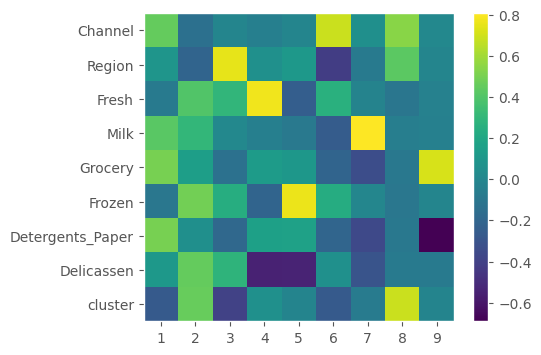

In [44]:
# Heatmap componentes
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 4))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(X_numeric.columns)), X_numeric.columns) # Use numeric columns
plt.xticks(range(modelo_pca.n_components_), np.arange(modelo_pca.n_components_) + 1) # Match ticks and labels
plt.grid(False)
plt.colorbar();

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.3604097  0.23522631 0.14843267 0.08263037 0.06185874 0.05801958
 0.03142311 0.015026   0.00697352]


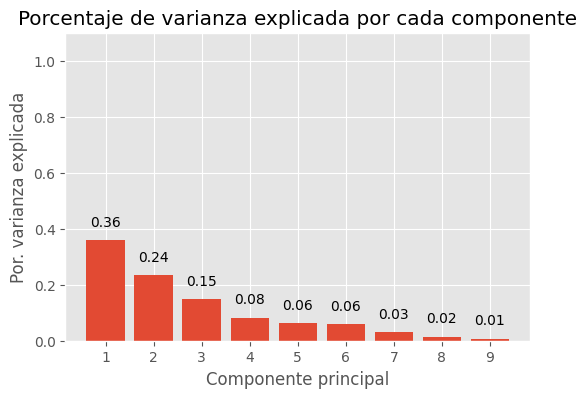

In [45]:
# Porcentaje de varianza explicada por cada componente
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(df.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.3604097  0.59563601 0.74406869 0.82669905 0.88855779 0.94657737
 0.97800048 0.99302648 1.        ]


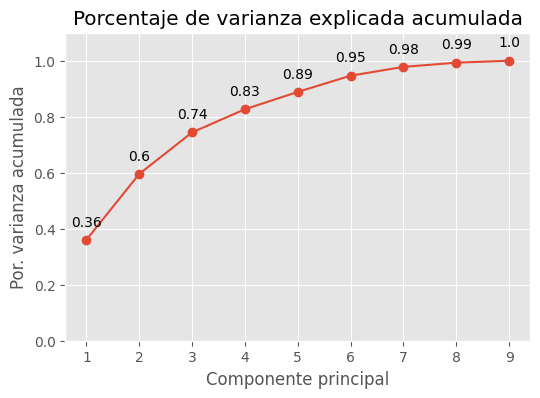

In [46]:
# Porcentaje de varianza explicada acumulada
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(modelo_pca.n_components_) + 1, # Changed to match number of components
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(modelo_pca.n_components_) + 1, prop_varianza_acum): # Changed loop range
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

## Modelo

In [47]:
# Gráficos
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import multiprocessing


In [48]:
# Correlación entre columnas numéricas

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)

    return(corr_mat)

corr_matrix = df.select_dtypes(include=['float64', 'int']) \
              .corr(method='pearson')
display(tidy_corr_matrix(corr_matrix).head(5))

,variable_1,variable_2,r,abs_r
42,Grocery,Detergents_Paper,0.924641,0.924641
58,Detergents_Paper,Grocery,0.924641,0.924641
39,Grocery,Milk,0.728335,0.728335
31,Milk,Grocery,0.728335,0.728335
33,Milk,Detergents_Paper,0.661816,0.661816


In [49]:
# División de los datos en train y test
X = df.drop(columns='Region')
y = df['Region']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [50]:
# División de los datos en train y test
# Select only numerical features for the model
numerical_features = df.select_dtypes(include=['float64', 'int']).columns
X = df[numerical_features].drop(columns='Region')
y = df['Region']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Creación y entrenamiento del modelo
modelo = LinearRegression()
modelo.fit(X = X_train, y = y_train)

LinearRegression()

In [51]:
# Predicciones test
predicciones = modelo.predict(X=X_test)
predicciones = predicciones.flatten()

# Error de test del modelo
rmse_ols = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
           )
print("")
print(f"El error (rmse) de test es: {rmse_ols}")


El error (rmse) de test es: 0.527918808098326



## Con PCA

In [52]:
# Entrenamiento modelo de regresión precedido por PCA con escalado
pipe_modelado = make_pipeline(StandardScaler(), PCA(), LinearRegression())
pipe_modelado.fit(X=X_train, y=y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA()),
                ('linearregression', LinearRegression())])

In [53]:
pipe_modelado.set_params

<bound method Pipeline.set_params of Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA()),
                ('linearregression', LinearRegression())])>

In [54]:
# Predicciones test
predicciones = pipe_modelado.predict(X=X_test)
predicciones = predicciones.flatten()

# Error de test del modelo
rmse_pcr = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
           )
print("")
print(f"El error (rmse) de test es: {rmse_pcr}")


El error (rmse) de test es: 0.5279188080983268


In [55]:
# Grid de hiperparámetros evaluados
param_grid = {'pca__n_components': [1, 2, 4, 5, 6]}

# Búsqueda por grid search con validación cruzada
grid = GridSearchCV(
        estimator  = pipe_modelado,
        param_grid = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = KFold(n_splits=5, shuffle=True, random_state=123), # Added shuffle=True
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(3)

,param_pca__n_components,mean_test_score,std_test_score,mean_train_score,std_train_score
4,6,-0.561129,0.072124,-0.527829,0.011221
3,5,-0.687911,0.044798,-0.667847,0.013295
2,4,-0.688797,0.045079,-0.669128,0.013232


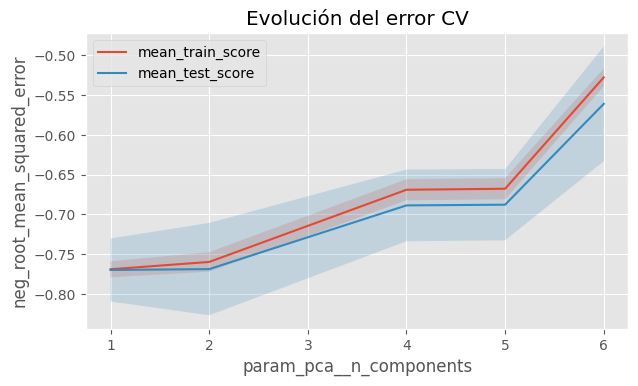

In [56]:
# Gráfico resultados validación cruzada para cada hiperparámetro
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 3.84), sharey=True)

resultados.plot('param_pca__n_components', 'mean_train_score', ax=ax)
resultados.plot('param_pca__n_components', 'mean_test_score', ax=ax)
ax.fill_between(resultados.param_pca__n_components.astype(float), # Changed np.float to float
                resultados['mean_train_score'] + resultados['std_train_score'],
                resultados['mean_train_score'] - resultados['std_train_score'],
                alpha=0.2)
ax.fill_between(resultados.param_pca__n_components.astype(float), # Changed np.float to float
                resultados['mean_test_score'] + resultados['std_test_score'],
                resultados['mean_test_score'] - resultados['std_test_score'],
                alpha=0.2)
ax.legend()
ax.set_title('Evolución del error CV')
ax.set_ylabel('neg_root_mean_squared_error');

In [57]:
# Mejores hiperparámetros por validación cruzada
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'pca__n_components': 6} : -0.5611294456407061 neg_root_mean_squared_error


Los resultados de validación cruzada muestran que, el mejor modelo, se obtiene empleando las 4 primeras componentes. Sin embargo, teniendo en cuenta la evolución del error y su intervalo, a partir de la 2 componente no se consiguen mejoras significativas.

In [58]:
# Entrenamiento modelo de regresión precedido por PCA con escalado
pipe_modelado = make_pipeline(StandardScaler(), PCA(n_components=5), LinearRegression())
pipe_modelado.fit(X=X_train, y=y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=5)),
                ('linearregression', LinearRegression())])

In [59]:
# Predicciones test
predicciones = pipe_modelado.predict(X=X_test)
predicciones = predicciones.flatten()

# Error de test del modelo
rmse_pcr = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
           )
print("")
print(f"El error (rmse) de test es: {rmse_pcr}")


El error (rmse) de test es: 0.6294736195710772


Fuente:

*   https://cienciadedatos.net/documentos/py19-pca-python
*   https://cienciadedatos.net/documentos/py19-pca-python
*   https://www.kaggle.com/



